<a href="https://colab.research.google.com/github/rbb-99/telco-customer-churn/blob/main/TelcoCustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install mlflow --quiet
!pip3 install pyngrok --quiet
!pip3 install pyyaml==5.4.1 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.7/718.7 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies

# Imports

In [120]:
import numpy as np # Linear Algebra
import pandas as pd
import math
import time
import multiprocessing
import os

from imblearn.over_sampling import SMOTE

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from pandas import get_dummies

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Evaluation Metrics
from sklearn.metrics import f1_score, classification_report, confusion_matrix

import mlflow
import statsmodels.api as sm

# Tensorflow
import tensorflow as tf
from tensorflow.keras import Input,Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# EDA - Exploratory Data Anlaysis

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Telco Customer Churn/Telco_customer.xlsx')
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [ ]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [ ]:
with mlflow.start_run(run_name="MLflow on Colab"):
  mlflow.log_metric("m1", 2.0)
  mlflow.log_param("p1", "mlflow-colab")

# run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &") # run tracking UI in the background


# create remote tunnel using ngrok.com to allow local port access
from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/get-started/your-authtoken
NGROK_AUTH_TOKEN = "2VfnGjb0dzzQ47WBtl3isLrs4sR_kdc8ba255tJF1mRK9nFp"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://7b9c-34-23-12-125.ngrok-free.app


In [ ]:
df['Churn Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
df['Total Charges'] = df['Total Charges'].apply(str).str.strip() # remove any leading and trailing whitespaces from each string in the 'Total Charges'
df['Total Charges'] = pd.to_numeric(df['Total Charges']) # new dtype is float64
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [ ]:
def report(df):
    cols = []
    data_types = []
    unique_values = []
    n_unique_values = []

    for col in df.columns:
        cols.append(col)
        data_types.append(df[col].dtypes)
        unique_values.append(df[col].unique()[:5])
        n_unique_values.append(df[col].nunique())

    return pd.DataFrame({'Column': cols, 'data_type': data_types, 'unique_values': unique_values, 'n_unique_values': n_unique_values})

In [ ]:
report(df)

,Column,data_type,unique_values,n_unique_values
0,CustomerID,object,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",7043
1,Count,int64,[1],1
2,Country,object,[United States],1
3,State,object,[California],1
4,City,object,"[Los Angeles, Beverly Hills, Huntington Park, ...",1129
5,Zip Code,int64,"[90003, 90005, 90006, 90010, 90015]",1652
6,Lat Long,object,"[33.964131, -118.272783, 34.059281, -118.30742...",1652
7,Latitude,float64,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",1652
8,Longitude,float64,"[-118.272783, -118.30742, -118.293953, -118.31...",1651
9,Gender,object,"[Male, Female]",2


In [ ]:
df1 = df.copy()
target = 'Churn Label'
summary_df = report(df1)
one_hot_cols = summary_df[summary_df.data_type=='object']['Column']
one_hot_cols

0            CustomerID
2               Country
3                 State
4                  City
6              Lat Long
9                Gender
10       Senior Citizen
11              Partner
12           Dependents
14        Phone Service
15       Multiple Lines
16     Internet Service
17      Online Security
18        Online Backup
19    Device Protection
20         Tech Support
21         Streaming TV
22     Streaming Movies
23             Contract
24    Paperless Billing
25       Payment Method
28          Churn Label
32         Churn Reason
Name: Column, dtype: object

In [ ]:
# Dropping columns with only one value type
del df1['Country']
del df1['State']
del df1['CustomerID']
del df1['Count']

<ipython-input-14-8e00bdf7476d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


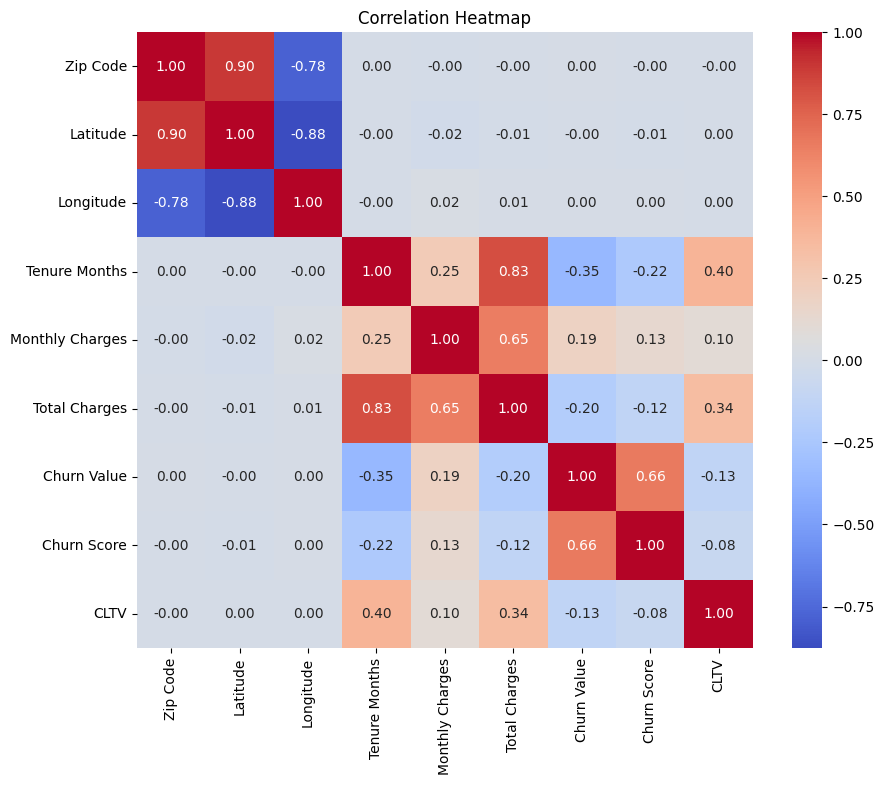

In [ ]:
corr = df1.corr()
# Create a heatmap with annotations for correlation values
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, annot_kws={'size': 10})
ax.set_title('Correlation Heatmap')
plt.show()

In [ ]:
# Dropping latitute, longitute, zip code as it has no purpose and other target (Churn Value) related variables
for col in ['Lat Long', 'Latitude','Longitude','Churn Score', 'CLTV', 'Churn Reason', 'Zip Code']:
  del df1[col]

In [ ]:
df1.isna().sum()

City                  0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Value           0
dtype: int64

In [ ]:
# replace empty strings with NaN values in df1
df1.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df1.isna().sum()

City                  0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Value           0
dtype: int64

In [ ]:
# since there are NaN values in total charges, let's impute it correctly
def imputeTotalCharges(df):
  for index, row in df.iterrows():
    if(math.isnan(row['Total Charges'])):
      df.at[index, 'Total Charges'] = df.at[index, 'Monthly Charges'] * df.at[index, 'Tenure Months']
      # row['Total Charges'] = row['Monthly Charges'] * row['Tenure Months']
  return df

df1 = imputeTotalCharges(df1)
df1

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value
0,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
1,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
2,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1
3,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1
4,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,Female,No,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0
7039,Adelanto,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0
7040,Amboy,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0
7041,Angelus Oaks,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0


In [ ]:
df1['Total Charges'].isna().sum()

0

In [ ]:
df2 = df1.copy()

In [ ]:
df2['Churn Label'].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

## Churn Distribution

In [ ]:
dfcl = df2['Churn Label'].value_counts().reset_index().rename(columns={'index':'Type'})
dfcl

,Type,Churn Label
0,No,5174
1,Yes,1869


In [ ]:
fig = px.pie(dfcl, values='Churn Label', names='Type', width=400, height=400)
fig.update_traces(textfont_size=18, textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Churn Distribution', title_x=0.5,title_y=0.9, showlegend=False)
fig.show()
del dfcl

- 26.5 % Of Customers Switched To Another Firm.

## Payment Method Distribution

In [ ]:
dfp = df2['Payment Method'].value_counts().reset_index().rename(columns={'index':'Type'})
dfp

,Type,Payment Method
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


In [ ]:
fig = px.pie(dfp, values='Payment Method', names='Type', title='Payment Method Distribution')
fig.update_traces(textposition='inside')
fig.show()
del dfp

In [ ]:
summary_df = report(df2)
one_hot_cols = summary_df[summary_df.data_type=='object']['Column']
one_hot_cols

0                  City
1                Gender
2        Senior Citizen
3               Partner
4            Dependents
6         Phone Service
7        Multiple Lines
8      Internet Service
9       Online Security
10        Online Backup
11    Device Protection
12         Tech Support
13         Streaming TV
14     Streaming Movies
15             Contract
16    Paperless Billing
17       Payment Method
20          Churn Label
Name: Column, dtype: object

In [ ]:
summary_df

,Column,data_type,unique_values,n_unique_values
0,City,object,"[Los Angeles, Beverly Hills, Huntington Park, ...",1129
1,Gender,object,"[Male, Female]",2
2,Senior Citizen,object,"[No, Yes]",2
3,Partner,object,"[No, Yes]",2
4,Dependents,object,"[No, Yes]",2
5,Tenure Months,int64,"[2, 8, 28, 49, 10]",73
6,Phone Service,object,"[Yes, No]",2
7,Multiple Lines,object,"[No, Yes, No phone service]",3
8,Internet Service,object,"[DSL, Fiber optic, No]",3
9,Online Security,object,"[Yes, No, No internet service]",3


## Categorical features against Target

### Working out the bar chart function

In [ ]:
tdf = df2.groupby(['Payment Method', 'Churn Value']).size().reset_index().rename(columns={0:'Type'})
tdf

,Payment Method,Churn Value,Type
0,Bank transfer (automatic),0,1286
1,Bank transfer (automatic),1,258
2,Credit card (automatic),0,1290
3,Credit card (automatic),1,232
4,Electronic check,0,1294
5,Electronic check,1,1071
6,Mailed check,0,1304
7,Mailed check,1,308


In [ ]:
vcdf = df2['Payment Method'].value_counts().reset_index().rename(columns={'index':'Type'})
vcdf

,Type,Payment Method
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


In [ ]:
[df['Type'] for idx,df in vcdf.iterrows()]

['Electronic check',
 'Mailed check',
 'Bank transfer (automatic)',
 'Credit card (automatic)']

In [ ]:
# [df['Payment Method'] for idx,df in vcdf.iterrows()]
[df[1] for idx,df in vcdf.iterrows()]

[2365, 1612, 1544, 1522]

In [ ]:
del tdf,vcdf

### Defining bar chart function

In [ ]:
# Defining string formatting for graph annotation
# Numeric section :  a comma and space are appended after all but the last two numbers in the list, space and & are appended after second to last num
def num_format(list_instance):
    formatted_str = ''
    for index,num in enumerate(list_instance):
        if index < len(list_instance)-2: formatted_str=formatted_str+f'{num}%, '
        elif index == len(list_instance)-2: formatted_str=formatted_str+f'{num}% & '
        else: formatted_str=formatted_str+f'{num}%'
    return formatted_str

# Categorical section
def str_format(list_instance):
    formatted_str = ''
    for index, cat in enumerate(list_instance):
        if index < len(list_instance)-2: formatted_str=formatted_str+f'{cat}, '
        elif index == len(list_instance)-2: formatted_str=formatted_str+f'{cat} & '
        else: formatted_str=formatted_str+f'{cat}'
    return formatted_str

def bar(cat_feature,df=df2):

    # Groupby the categorical feature
    temp_df = df.groupby([cat_feature, 'Churn Value']).size().reset_index().rename(columns={0:'Count'})

    # Calculate the value counts of each distribution and it's corresponding Percentages
    cat_value_counts_df = df[cat_feature].value_counts().reset_index().rename(columns={'index':'Type'})
    categories = [df['Type'] for idx,df in cat_value_counts_df.iterrows()]

    # Calculate the value counts of each distribution and it's corresponding Percentages
    type_num_list = [df[1] for idx,df in cat_value_counts_df.iterrows()]
    div_list = [element / sum(type_num_list) for element in type_num_list]
    type_percentage = [round(element * 100,1) for element in div_list]

    # Running the formatting functions
    num_str = num_format(type_percentage)
    cat_str = str_format(categories)

    # Setting graph framework
    fig = px.bar(temp_df, x=cat_feature, y='Count', color='Churn Value', title=f'Churn rate by {cat_feature}', barmode="group")
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are {num_str} percentage respectively.',
                showarrow=False,
                xref='paper', yref='paper', x=1.2, y=1.2)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )

    return fig.show()

In [ ]:
# bar('Device Protection')

### Bar Plots (Cat Vs. Target)

In [ ]:
for cat_col in one_hot_cols:
  bar(cat_col)

Summary:
- No city had a high churn rate (we might as well drop this column).
- Both Genders Behaved In Similar Fashion When It Came To Migrating To Another Service Provider/Firm.
- Most Of The Senior Citizens Churn.
- About 75% Of Customer With Month-To-Month Contract Opted To Move Out As Compared To 13% Of Customers With One Year Contract And 3% With Two Year Contract.
- Major Customers Who Moved Out Had An Electronic Check As Payment Method On File. Customers Who Opted For Credit-Card Automatic Transfer or Bank Automatic Transfer or Mailed Check As Payment Method Were Less Likely To Move Out.
- Customers With Paperless Billing Are Most Likely To Churn.
- Customers with no internet services were less likely to churn.
- Streaming Movies or TV made no difference in the Churn rate. They would churn irrespective of this status.
- Customers which were offered no tech support or did not consult the tech support were highly likely to churn.
- 66% of the Customers with no online backup switched whereas only 27% of those who did have a backup dfdf33.
- Most of those no online security dfdf33.
- Those customers that had fibre optic internet services were more likely to churn.



In [ ]:
df2.drop(columns=['City'],inplace=True)

## Numerical features against Target

In [ ]:
num_cols = summary_df[(summary_df.data_type=='int64') | (summary_df.data_type=='float64')].Column
num_cols

5       Tenure Months
18    Monthly Charges
19      Total Charges
21        Churn Value
Name: Column, dtype: object

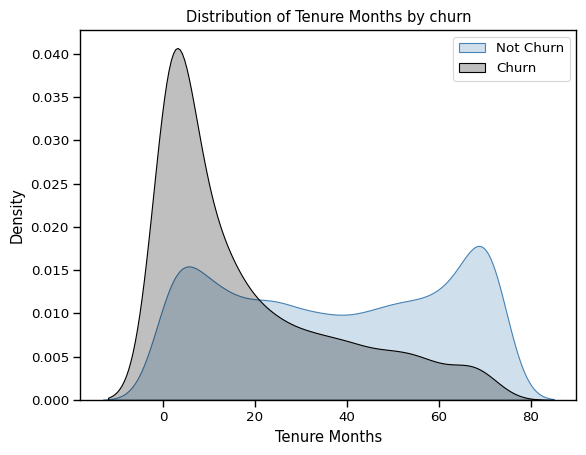

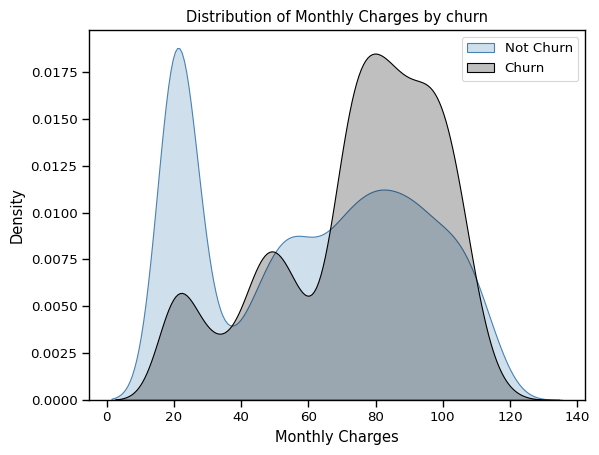

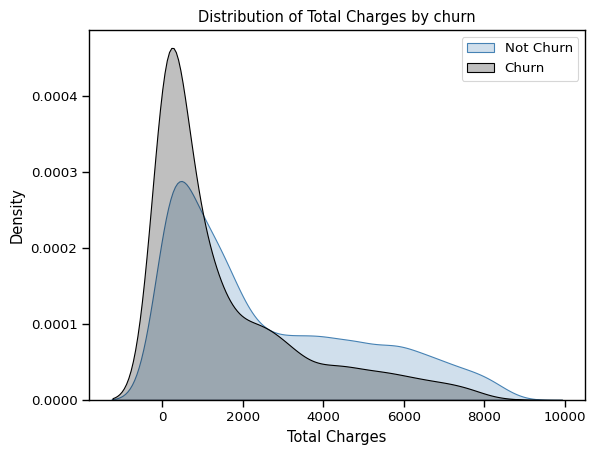

In [ ]:
for col in num_cols[:3]:
  sns.set_context("paper",font_scale=1.1)

  ax = sns.kdeplot(df2[col][(df2['Churn Value'] == 0) ], color="steelblue", fill = True)
  ax = sns.kdeplot(df2[col][(df2['Churn Value'] == 1) ], ax =ax, color="black", fill= True)

  ax.legend(["Not Churn","Churn"],loc='upper right')
  ax.set_ylabel('Density')
  ax.set_xlabel(col)
  ax.set_title(f'Distribution of {col} by churn')

  plt.show()
  print()

# Feature Selection

In [ ]:
df3 = df2.copy()

In [ ]:
report(df3)

,Column,data_type,unique_values,n_unique_values
0,Gender,object,"[Male, Female]",2
1,Senior Citizen,object,"[No, Yes]",2
2,Partner,object,"[No, Yes]",2
3,Dependents,object,"[No, Yes]",2
4,Tenure Months,int64,"[2, 8, 28, 49, 10]",73
5,Phone Service,object,"[Yes, No]",2
6,Multiple Lines,object,"[No, Yes, No phone service]",3
7,Internet Service,object,"[DSL, Fiber optic, No]",3
8,Online Security,object,"[Yes, No, No internet service]",3
9,Online Backup,object,"[Yes, No, No internet service]",3


In [ ]:
n_cpus = multiprocessing.cpu_count()
n_cpus

2

In [ ]:
# Label Encoding
codes = {'Male':0, 'Female':1}
df3['Gender'] = df3['Gender'].map(codes)

codes = {'No':0, 'Yes':1}
for col in ['Senior Citizen', 'Partner','Dependents','Phone Service','Paperless Billing']:
	df3[col] = df3[col].map(codes)

codes = {'No':0, 'Yes':1,'No phone service':2}
df3['Multiple Lines'] = df3['Multiple Lines'].map(codes)

codes = {'DSL':0, 'Fiber optic':1,'No':2}
df3['Internet Service'] = df3['Internet Service'].map(codes)

codes = {'Yes':0, 'No':1,'No internet service':2}
for col in ['Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies']:
	df3[col] = df3[col].map(codes)

codes = {'Month-to-month':0, 'Two year':1,'One year':2}
df3['Contract'] = df3['Contract'].map(codes)

codes = {'Mailed check':0, 'Electronic check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3}
df3['Payment Method'] = df3['Payment Method'].map(codes)

In [ ]:
df3.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value'],
      dtype='object')

In [ ]:
x_ols_features = ['Gender', 'Senior Citizen', 'Partner', 'Dependents',
                  'Tenure Months','Phone Service', 'Multiple Lines',
                  'Internet Service','Online Security', 'Online Backup',
                  'Device Protection', 'Tech Support','Streaming TV',
                  'Streaming Movies', 'Contract', 'Paperless Billing',
                  'Payment Method', 'Monthly Charges', 'Total Charges']
y_ols = df3["Churn Value"]

In [ ]:
x_ols = df3[x_ols_features]
results = sm.OLS(y_ols, x_ols.astype(float)).fit()
results_summary = results.summary()
print(results_summary)

                                 OLS Regression Results                                
Dep. Variable:            Churn Value   R-squared (uncentered):                   0.479
Model:                            OLS   Adj. R-squared (uncentered):              0.477
Method:                 Least Squares   F-statistic:                              339.3
Date:                Thu, 21 Sep 2023   Prob (F-statistic):                        0.00
Time:                        10:21:21   Log-Likelihood:                         -3028.7
No. Observations:                7043   AIC:                                      6095.
Df Residuals:                    7024   BIC:                                      6226.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [ ]:
results_as_html = results_summary.tables[1].as_html()
result_sum = pd.read_html(results_as_html, header=0, index_col=0)[0]
result_sum

,coef,std err,t,P>|t|,[0.025,0.975]
Gender,-0.001800,0.009000,-0.199,0.842,-0.019000,0.016000
Senior Citizen,0.041800,0.013000,3.285,0.001,0.017000,0.067000
Partner,0.035300,0.010000,3.431,0.001,0.015000,0.055000
Dependents,-0.159900,0.012000,-13.685,0.000,-0.183000,-0.137000
Tenure Months,-0.002200,0.000000,-4.778,0.000,-0.003000,-0.001000
Phone Service,-0.196200,0.035000,-5.540,0.000,-0.266000,-0.127000
Multiple Lines,0.001600,0.012000,0.129,0.897,-0.022000,0.025000
Internet Service,-0.039600,0.012000,-3.198,0.001,-0.064000,-0.015000
Online Security,0.063100,0.011000,5.560,0.000,0.041000,0.085000
Online Backup,0.025600,0.011000,2.394,0.017,0.005000,0.047000


In [ ]:
# get_stats performs stepwise regression using ordinary least squares (OLS) for feature selection
# The goal is to iteratively remove features with the highest p-values (indicating less significance)
# until all remaining features have p-values less than or equal to 0.05.
def get_stats():
    x_ols = df3[x_ols_features]
    results = sm.OLS(y_ols, x_ols.astype(float)).fit()
    results_summary = results.summary()
    # print(results_summary)
    results_as_html = results_summary.tables[1].as_html()
    result_sum = pd.read_html(results_as_html, header=0, index_col=0)[0]
    p_val = result_sum['P>|t|']
    if max(p_val) <= 0.05 :
        return x_ols_features , p_val, False
    # st.header('Column to be removed is',p_val.idxmax())
    print("*"*30)
    print("Dropping " + p_val.idxmax())
    x_ols_features.remove(p_val.idxmax())
    return x_ols_features, p_val, True

In [ ]:
con = True
while(con):
  x_ols_features, p_val, con = get_stats()

******************************
Dropping Multiple Lines
******************************
Dropping Streaming TV
******************************
Dropping Gender
******************************
Dropping Streaming Movies


In [ ]:
df4 = df1[x_ols_features]
df4

,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,No,No,No,2,Yes,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,No,No,Yes,2,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,No,No,Yes,8,Yes,Fiber optic,No,No,Yes,No,Month-to-month,Yes,Electronic check,99.65,820.50
3,No,Yes,Yes,28,Yes,Fiber optic,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,No,No,Yes,49,Yes,Fiber optic,No,Yes,Yes,No,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,No,No,72,Yes,No,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40
7039,No,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7040,No,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),103.20,7362.90
7041,No,Yes,Yes,11,No,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45


In [ ]:
cat_cols = [cname for cname in df4.columns if df4[cname].dtype == "object"]
cat_cols

['Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [ ]:
ohe = OneHotEncoder(sparse_output=False)
train_X_encoded = pd.DataFrame (ohe.fit_transform(df4[cat_cols]))
train_X_encoded

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7039,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7040,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
ohe.get_feature_names_out(cat_cols)

array(['Senior Citizen_No', 'Senior Citizen_Yes', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'Phone Service_No', 'Phone Service_Yes', 'Internet Service_DSL',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Paperless Billing_No',
       'Paperless Billing_Yes',
       'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype=object)

In [ ]:
train_X_encoded.columns = ohe.get_feature_names_out(cat_cols)

In [ ]:
train_X_encoded

,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Internet Service_DSL,Internet Service_Fiber optic,...,Tech Support_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7039,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7040,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df4.drop(cat_cols,axis=1,inplace=True)
df4

<ipython-input-61-991cf5ee3078>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Tenure Months,Monthly Charges,Total Charges
0,2,53.85,108.15
1,2,70.70,151.65
2,8,99.65,820.50
3,28,104.80,3046.05
4,49,103.70,5036.30
...,...,...,...
7038,72,21.15,1419.40
7039,24,84.80,1990.50
7040,72,103.20,7362.90
7041,11,29.60,346.45


In [ ]:
df5 = pd.concat([df4,train_X_encoded],axis=1)
df5

,Tenure Months,Monthly Charges,Total Charges,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,...,Tech Support_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,108.15,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,70.70,151.65,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,8,99.65,820.50,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,28,104.80,3046.05,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,49,103.70,5036.30,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,21.15,1419.40,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7039,24,84.80,1990.50,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7040,72,103.20,7362.90,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,11,29.60,346.45,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df5[target] = y_ols
df5

,Tenure Months,Monthly Charges,Total Charges,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn Label
0,2,53.85,108.15,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,2,70.70,151.65,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,8,99.65,820.50,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,28,104.80,3046.05,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,49,103.70,5036.30,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,21.15,1419.40,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0
7039,24,84.80,1990.50,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
7040,72,103.20,7362.90,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
7041,11,29.60,346.45,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [ ]:
# We need 'categorical' type for categorical columns for lightgbm
# for col in df4.columns:
#    if col in cat_columns:
#        df4[col] = df4[col].astype('category')

# df5 = pd.get_dummies(df4, columns = cat_cols)

# Model Selection

In [ ]:
X = df5.drop('Churn Label', axis=1)
y = df5['Churn Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Tenure Months,Monthly Charges,Total Charges,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,...,Tech Support_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
2142,71,98.65,6962.85,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1623,16,93.20,1573.70,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6074,32,104.05,3416.85,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1362,24,40.65,933.30,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6754,20,20.05,406.05,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,42,100.40,4303.65,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5191,39,20.70,762.45,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5226,19,20.20,387.40,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5390,35,19.90,666.00,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
def evaluate(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    '''
    classifier_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict = True))
    print("Test Result:\n================================================")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"F1 Score: {round(f1_score(y_test, y_pred, average=avgMethod), 5)}")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{classifier_report}")
    print("_______________________________________________")
    '''
    print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
    return round(f1_score(y_test, y_pred, average='weighted'), 5)

In [ ]:
n_cpus = multiprocessing.cpu_count()
n_cpus

2

### Defining Models

In [ ]:
def logisticRegModelWithParameterTuning(X_train, y_train, X_test, y_test):
    t1= time.time()
    logistic_reg = LogisticRegression()
    params = {
        "C": [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4], # For Regularization
        "solver": ["liblinear"]
    }

    logistic_reg_cv = GridSearchCV(logistic_reg, params, scoring = "accuracy", n_jobs = n_cpus , verbose = 0, cv = 5)
    logistic_reg_cv.fit(X_train, y_train)
    best_params = logistic_reg_cv.best_params_
    print(f"Best parameters: {best_params}")

    # Train the model with best params
    logistic_reg = LogisticRegression(**best_params, class_weight='balanced')
    logistic_reg.fit(X_train, y_train)
    logistic_reg_f1 = evaluate(logistic_reg, X_train, y_train, X_test, y_test)
    t2 = time.time()
    print("Logistic Regression is done with F1 score " + str(logistic_reg_f1) + " in time " + str(t2-t1))

In [ ]:
def svmModelWithParameterTuning(X_train, y_train, X_test, y_test):
    t1= time.time()
    svm = SVC()
    params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']
    }

    svm_cv= GridSearchCV(svm, params, scoring = "accuracy", n_jobs = n_cpus , verbose = 0, cv = 5)
    svm_cv.fit(X_train, y_train)
    best_params = svm_cv.best_params_
    print(f"Best parameters: {best_params}")

    # best_params = {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
    svm=SVC(**best_params)
    svm.fit(X_train, y_train)
    svm_f1=evaluate(svm, X_train, y_train, X_test, y_test)
    t2= time.time()
    print("SVM is done with F1 score " + str(svm_f1)  + " in time " + str(t2-t1))

In [ ]:
def randomForestModelWithParameterTuning(X_train, y_train, X_test, y_test):
    t1= time.time()
    rfc = RandomForestClassifier()
    params = { 'n_estimators': [50, 150, 250,350,450],
      'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
      'min_samples_split': [2, 4, 6]
      }

    rfc_cv = GridSearchCV(rfc, params, scoring = "accuracy", n_jobs = n_cpus , verbose = 0, cv = 5)
    rfc_cv.fit(X_train, y_train)
    best_params = rfc_cv.best_params_
    print(f"Best parameters: {best_params}")

    # best_params = {'max_features': 0.25, 'min_samples_split': 6, 'n_estimators': 250}
    rfc = RandomForestClassifier(**best_params)
    rfc.fit(X_train, y_train)
    rf_f1 = evaluate(rfc, X_train, y_train, X_test, y_test)
    t2 = time.time()
    print("RandomForest is done with F1 score " + str(rf_f1)  + " in time " + str(t2-t1))

In [ ]:
def knnModelWithParameterTuning(X_train, y_train, X_test, y_test):
    t1= time.time()
    f1 = []
    for i in range(1, 10):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train, y_train)
        f1.append(f1_score(y_test, knn.predict(X_test)))

    n = f1.index(max(f1))
    print(n)
    # print("Trained KNN MODEL")
    # print("Printing out the model performance")
    knn = KNeighborsClassifier(n_neighbors = n+1)
    knn.fit(X_train, y_train)
    print(f1)

    plt.figure(figsize=(12, 8))
    plt.plot(range(1,10), f1, label="Train score")
    # plt.plot(neighbors, test_score, label="Test score")
    plt.xticks(np.arange(1, 10, 1))
    plt.xlabel("Number of Neighbors")
    plt.ylabel("Model Score")
    plt.legend()

    knn_f1 = evaluate(knn, X_train, y_train, X_test, y_test)
    t2 = time.time()
    print("KNN is done with F1 score " + str(knn_f1)  + " in time " + str(t2-t1) )

In [ ]:
def xgbModelWithParameterTuning(X_train, y_train, X_test, y_test):
    t1 = time.time()
    xgb_m = xgb.XGBClassifier()
    params = {
      'n_estimators': range(5,10),
      'max_depth': range(1,5),
      'learning_rate': [.1,.4, .45, .5, .55, .6],
      'colsample_bytree': [.6, .7, .8, .9, 1],
      'booster':["gbtree"],
      'min_child_weight': [0.001,0.003,0.01],
    }

    xgb_cv = GridSearchCV(xgb_m, params, scoring = "accuracy", n_jobs = n_cpus , verbose = 0, cv = 5)
    xgb_cv.fit(X_train, y_train)
    best_params = xgb_cv.best_params_
    print(f"Best parameters: {best_params}")

    # best_params = {'booster': 'gbtree', 'colsample_bytree': 0.8, 'learning_rate': 0.6, 'max_depth': 2, 'min_child_weight': 0.001, 'n_estimators': 9}
    xgb_m = xgb.XGBClassifier(**best_params)
    xgb_m.fit(X_train, y_train)
    xgb_f1=evaluate(xgb_m, X_train, y_train, X_test, y_test)
    t2 = time.time()
    print("XGBoost is done with F1 score " + str(xgb_f1)  + " in time " + str(t2-t1))

In [ ]:
def lgbmModelWithParameterTuning(X_train, y_train, X_test, y_test):
    import lightgbm
    t1= time.time()
    lgb = lightgbm.LGBMClassifier(random_state=1)
    param_grid = {
      'max_depth': [5,6,7,4, 9,10,12],
      'num_leaves': [4,11, 9,10],
      'learning_rate': [0.1,0.01,0.001,0.2],
      'scale_pos_weight': [3],
      'n_estimators': [50, 100],
      'reg_lambda': [10, 15,20,25],
      'subsample': [0.9],
      'colsample_bytree': [0.5, 0.6]
    }

    opt_params = GridSearchCV(estimator=lgb, param_grid=param_grid, scoring='roc_auc', verbose=False, cv=3)
    opt_params.fit(X_train, y_train)
    best_params = opt_params.best_params_
    print(f"Best parameters: {best_params}")

    # best_params = {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'num_leaves': 4, 'reg_lambda': 15, 'scale_pos_weight': 3, 'subsample': 0.9}
    lgb = lightgbm.LGBMClassifier(**best_params)
    lgb.fit(X_train, y_train)

    lgb_f1 = evaluate(lgb, X_train, y_train, X_test, y_test)
    t2 = time.time()
    print("lightBoost is done with F1 score " + str(lgb_f1)  + " in time " + str(t2-t1))

In [ ]:
def ensemble(X_train, y_train, X_test, y_test):
    lr = LogisticRegression()
    svm = SVC()
    rfc = RandomForestClassifier()
    xgb_m = xgb.XGBClassifier()
    # lgb = lightgbm.LGBMClassifier()

    estimators=[('lr', lr), ('svm', svm), ('rfc', rfc), ('xgb_m', xgb_m)]
    ensemble = VotingClassifier(estimators, voting='hard')
    ensemble.fit(X_train, y_train)

    ensemble_f1 = evaluate(ensemble, X_train, y_train, X_test, y_test)
    print("ensemble is done with F1 score " + str(ensemble_f1))

### Running Models

In [ ]:
logisticRegModelWithParameterTuning(X_train, y_train, X_test, y_test)

Best parameters: {'C': 0.01, 'solver': 'liblinear'}
Confusion Matrix: 
 [[741 268]
 [ 78 322]]

Logistic Regression is done with F1 score 0.76524 in time 6.357908248901367


In [ ]:
svmModelWithParameterTuning(X_train, y_train, X_test, y_test)

Best parameters: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Confusion Matrix: 
 [[933  76]
 [228 172]]

SVM is done with F1 score 0.7665 in time 249.38394355773926


In [ ]:
randomForestModelWithParameterTuning(X_train, y_train, X_test, y_test)

Best parameters: {'max_features': 0.25, 'min_samples_split': 6, 'n_estimators': 250}
Confusion Matrix: 
 [[910  99]
 [182 218]]

RandomForest is done with F1 score 0.79296 in time 840.9653952121735


6
[0.49261083743842365, 0.37883959044368604, 0.4881450488145049, 0.43305785123966944, 0.5157593123209169, 0.4781906300484653, 0.5301914580265096, 0.4848484848484848, 0.516320474777448]
Confusion Matrix: 
 [[910  99]
 [220 180]]

KNN is done with F1 score 0.75983 in time 1.0759401321411133


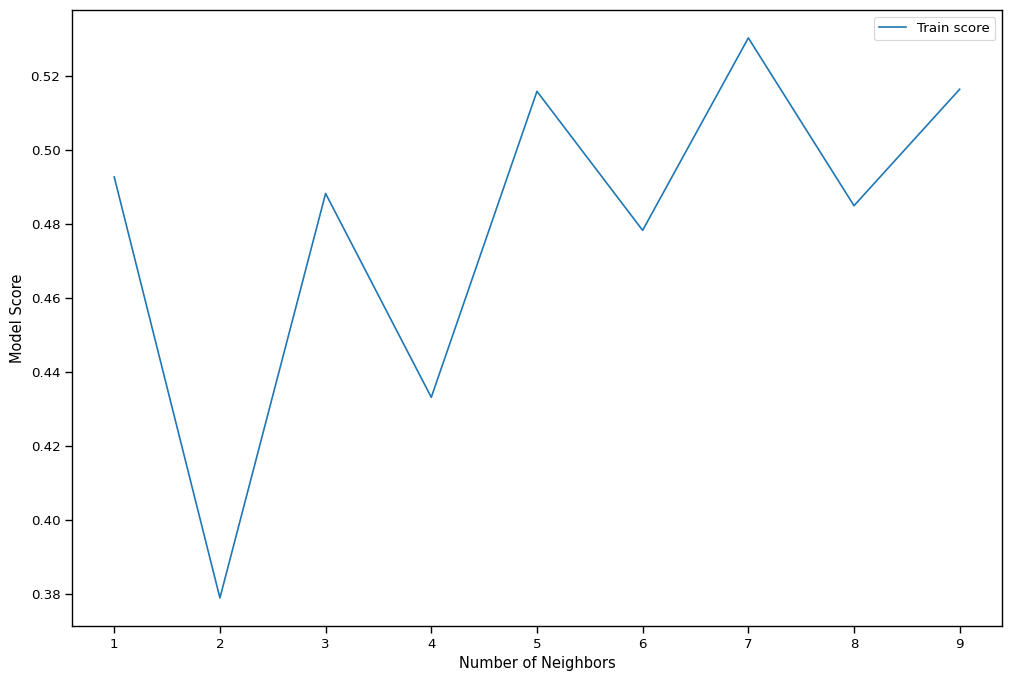

In [ ]:
knnModelWithParameterTuning(X_train, y_train, X_test, y_test)

In [ ]:
xgbModelWithParameterTuning(X_train, y_train, X_test, y_test)

Best parameters: {'booster': 'gbtree', 'colsample_bytree': 0.8, 'learning_rate': 0.6, 'max_depth': 2, 'min_child_weight': 0.001, 'n_estimators': 9}
Confusion Matrix: 
 [[913  96]
 [197 203]]

XGBoost is done with F1 score 0.78198 in time 323.8303482532501


In [ ]:
lgbmModelWithParameterTuning(X_train, y_train, X_test, y_test)

Streaming output truncated to the last 5000 lines.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260650 -> initscore=-1.042595
[LightGBM] [Info] Start training from score -1.042595
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 979, number of negative: 2777
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260650 -> initscore=-1.042595
[LightGBM] [Info] Start training from score 

In [ ]:
ensemble(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Confusion Matrix: 
 [[951  58]
 [233 167]]

ensemble is done with F1 score 0.7728


### Pass Scaled Features

In [ ]:
sc = StandardScaler()
X_train_std = X_train.copy()
X_test_std = X_test.copy()
X_train_std.columns

Index(['Tenure Months', 'Monthly Charges', 'Total Charges',
       'Senior Citizen_No', 'Senior Citizen_Yes', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'Phone Service_No',
       'Phone Service_Yes', 'Internet Service_DSL',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'Paperless Billing_No', 'Paperless Billing_Yes',
       'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtyp

In [ ]:
X_train_std[['Tenure Months',	'Monthly Charges',	'Total Charges']] = sc.fit_transform(np.array(X_train_std[['Tenure Months',	'Monthly Charges',	'Total Charges']]))
X_test_std[['Tenure Months',	'Monthly Charges',	'Total Charges']] = sc.fit_transform(np.array(X_test_std[['Tenure Months',	'Monthly Charges',	'Total Charges']]))

In [ ]:
logisticRegModelWithParameterTuning(X_train_std, y_train, X_test_std, y_test)

Best parameters: {'C': 10.0, 'solver': 'liblinear'}
Confusion Matrix: 
 [[746 263]
 [ 79 321]]

Logistic Regression is done with F1 score 0.76779 in time 4.9108757972717285


In [ ]:
svmModelWithParameterTuning(X_train_std, y_train, X_test_std, y_test)

Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Confusion Matrix: 
 [[917  92]
 [195 205]]

SVM is done with F1 score 0.7862 in time 133.49001932144165


In [ ]:
randomForestModelWithParameterTuning(X_train_std, y_train, X_test_std, y_test)

Best parameters: {'max_features': 0.25, 'min_samples_split': 6, 'n_estimators': 350}
Confusion Matrix: 
 [[916  93]
 [188 212]]

RandomForest is done with F1 score 0.79161 in time 769.1465344429016


8
[0.5279187817258884, 0.4617940199335548, 0.5718120805369128, 0.5251908396946565, 0.596078431372549, 0.5618631732168851, 0.6124031007751939, 0.5681818181818182, 0.618798955613577]
Confusion Matrix: 
 [[880 129]
 [163 237]]

KNN is done with F1 score 0.78988 in time 1.7407150268554688


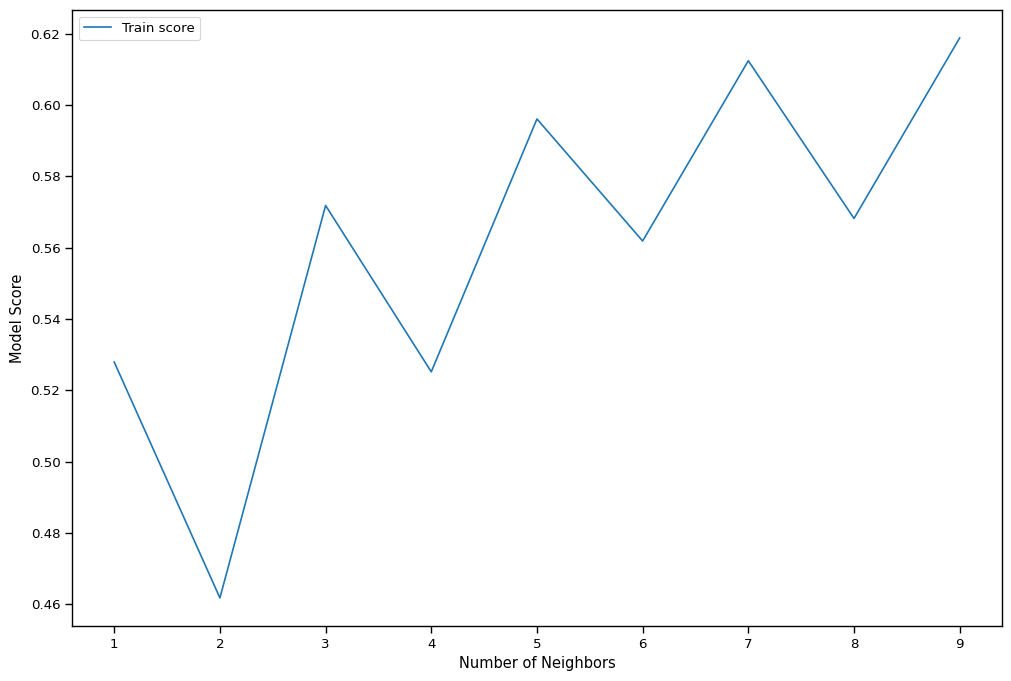

In [ ]:
knnModelWithParameterTuning(X_train_std, y_train, X_test_std, y_test)

In [ ]:
xgbModelWithParameterTuning(X_train_std, y_train, X_test_std, y_test)

Best parameters: {'booster': 'gbtree', 'colsample_bytree': 0.8, 'learning_rate': 0.6, 'max_depth': 2, 'min_child_weight': 0.001, 'n_estimators': 9}
Confusion Matrix: 
 [[917  92]
 [199 201]]

XGBoost is done with F1 score 0.78273 in time 285.7625765800476


In [ ]:
lgbmModelWithParameterTuning(X_train_std, y_train, X_test_std, y_test)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260650 -> initscore=-1.042595
[LightGBM] [Info] Start training from score -1.042595
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 980, number of negative: 2776
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260916 -> initscore=-1.041214
[LightGBM] [Info] Start training from score -1.041214
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightG

### Handle imbalance in the dataset

In [ ]:
print(df5['Churn Label'].value_counts(normalize=True))

0    0.73463
1    0.26537
Name: Churn Label, dtype: float64


Text(0.5, 1.0, 'Distribution of Churned Customers')

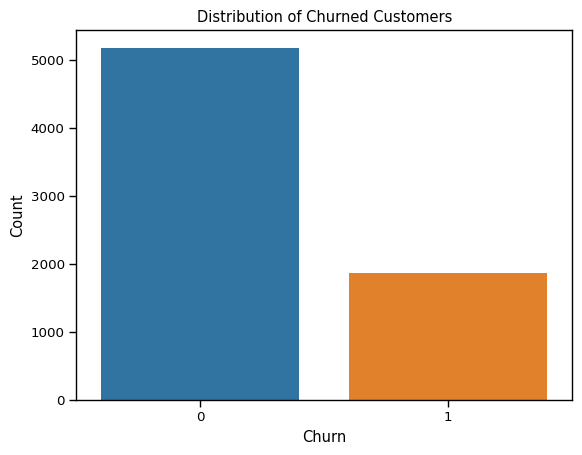

In [ ]:
# 70:30 imbalance in churn
churn_count = df5['Churn Label'].value_counts()
sns.barplot(x=churn_count.index, y=churn_count.values)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Distribution of Churned Customers")

In [ ]:
sm = SMOTE(random_state = 0)
X_train_std_res, y_train_std_res = sm.fit_resample(X_train_std, y_train.ravel())

### ANN

In [ ]:
input_layer = Input(shape=(X_train_std_res.shape[1],))
# normLayer = horsepower_normalizer(input_layer)
dense_layer_1 = Dense(128,activation='relu')(input_layer)
dense_layer_2 = Dense(64,activation='relu')(dense_layer_1)
dense_layer_3 = Dense(32,activation='relu')(dense_layer_2)
output_layer = Dense(1,activation='sigmoid')(dense_layer_3)

ann_model = Model(inputs=input_layer,outputs=output_layer)
ann_model.summary()

ann_model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(lr=0.001), metrics = ['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, verbose=1,patience=10, min_lr = 0.0000000001)
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)
history = ann_model.fit(X_train_std_res, y_train_std_res, epochs = 50, validation_split = 0.2, callbacks=[early_stopping_cb, reduce_lr])

y_pred = ann_model.predict(X_test_std)
y_pred

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 35)]              0         
                                                                 
 dense (Dense)               (None, 128)               4608      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14977 (58.50 KB)
Trainable params: 14977 (58.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
209/209 [==============================] - 2s 5ms/step - loss: 0.4632 - accuracy: 0.7764 - val_loss: 0.5083 - val_accuracy: 0.7797 - lr: 0.0010
Epoch 2/50
209/209 [==============================] - 1s 3ms/step - loss: 0.4377 - accuracy: 0.7869 - val_loss: 0.6194 - val_accuracy: 0.6933 - lr: 0.0010
Epoch 3/50
209/209 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.7920 - val_loss: 0.5352 - val_accuracy: 0.7503 - lr: 0.0010
Epoch 4/50
209/209 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.7902 - val_loss: 0.6286 - val_accuracy: 0.6705 - lr: 0.0010
Epoch 5/50
209/209 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.7964 - val_loss: 0.5538 - val_accuracy: 0.7605 - lr: 0.0010
Epoch 6/50
209/209 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8019 - val_loss: 0.4737 - val_accuracy: 0.7995 - lr: 0.0010
Epoch 7/50
209/209 [==============================] - 0s 2ms/step - lo

array([[8.0093473e-01],
       [3.3125870e-02],
       [4.7733164e-01],
       ...,
       [8.1314653e-01],
       [5.0854778e-06],
       [7.5199395e-01]], dtype=float32)

In [ ]:
y_pred = [1 if x > 0.5 else 0 for x in y_pred ]
y_pred = pd.Series(y_pred)
y_pred = y_pred.astype(int)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(f"F1 Score: {round(f1_score(y_test, y_pred, average='weighted'), 5)}")
print(f"CLASSIFICATION REPORT:\n{pd.DataFrame(classification_report(y_test, y_pred, output_dict = True))}")

[[802 207]
 [120 280]]
F1 Score: 0.77407
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.869848    0.574949  0.767921     0.722398      0.786129
recall        0.794846    0.700000  0.767921     0.747423      0.767921
f1-score      0.830658    0.631342  0.767921     0.731000      0.774074
support    1009.000000  400.000000  0.767921  1409.000000   1409.000000


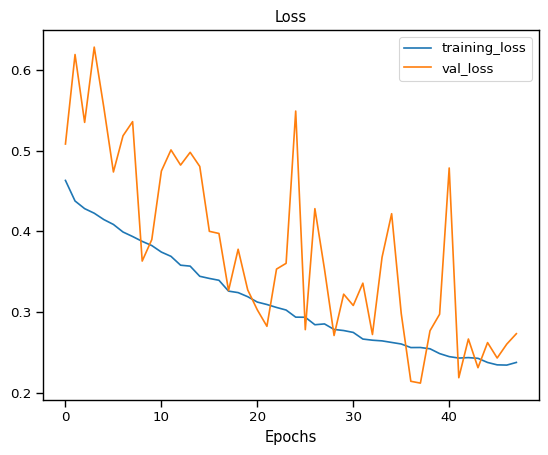

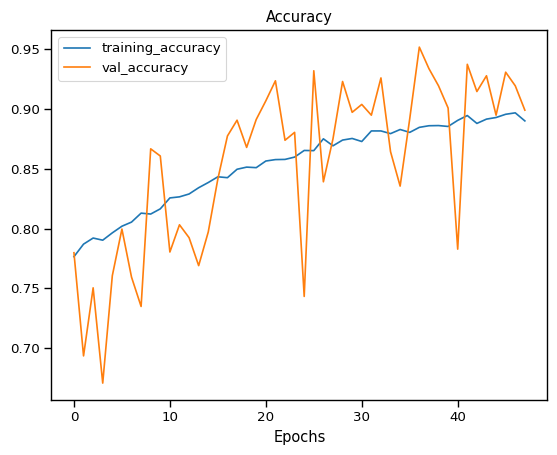

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.figure()

  # Plot accuracy
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

plot_loss_curves(history)